# Time Series Analysis

In [5]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load and VIsualize the Data Set

In [6]:
# Load the dataset from online
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
data = pd.read_csv(url, parse_dates=['Month'], index_col='Month')

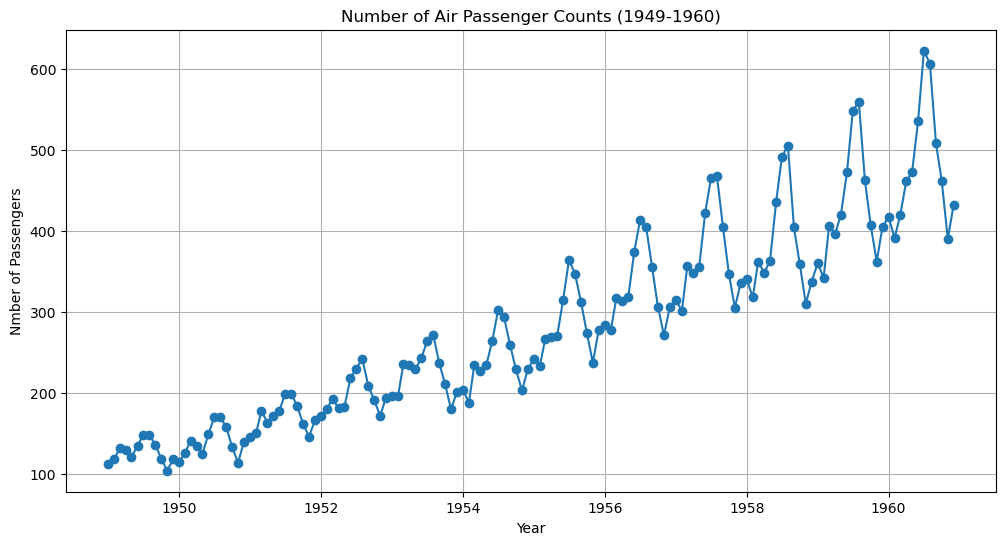

In [9]:
# Plot the time series and have a look at the data
plt.figure(figsize=(12,6))
plt.plot(data.index, data['Passengers'], marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Nmber of Passengers')
plt.title('Number of Air Passenger Counts (1949-1960)')
plt.grid()
plt.show()

### Assess whether or not the data is stationary. This means that the main statistical properties (mean/variance) remain constant over time.

In [10]:
from statsmodels.tsa.stattools import adfuller

# Perform an augmented Dickey-Fuller Test
def check_stationarity(series):
    result = adfuller(series)
    print("ADF Statistic: ", result[0])
    print("p-value: ", result[1])
    if result[1] <= 0.5:
        print("The series is stationary")
    else:
        print("The series is not stationary")
        
check_stationarity(data['Passengers'])

ADF Statistic:  0.8153688792060371
p-value:  0.9918802434376408
The series is not stationary


### Because the series is not stationary, we need to apply differencing to the data. 

ADF Statistic:  -2.829266824169981
p-value:  0.05421329028382792
The series is stationary


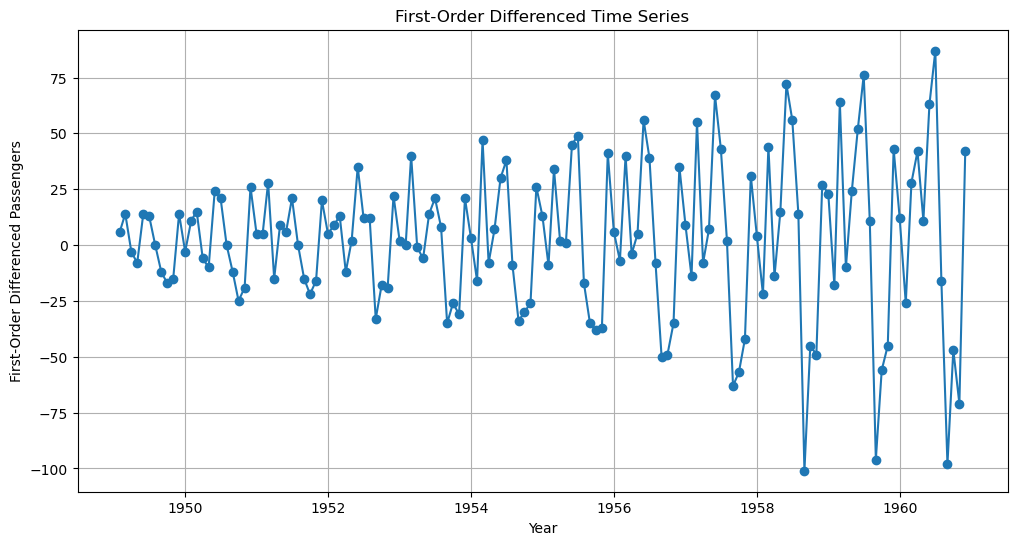

In [11]:
data['Passengers_diff'] = data['Passengers'].diff() #First-order differencing
data.dropna(inplace=True)

# Re-check the stationarity with the new differencing columns
check_stationarity(data['Passengers_diff'])

# Plot the first-order differenced series
plt.figure(figsize=(12,6))
plt.plot(data.index, data['Passengers_diff'], marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('First-Order Differenced Passengers')
plt.title('First-Order Differenced Time Series')
plt.grid()
plt.show()

### After applying first-order differencing, we will build out the ARIMA model

In [16]:
from pmdarima import auto_arima

# Auto-select the ARIMA parameters
model_auto = auto_arima(data['Passengers'], seasonal=True, m=12, trace=True)

# Display chosen parameters
print("Best Arima Order (p, d, q):", model_auto.order)
print("Best Seasonal Order  (P, D, Q, m):", model_auto.seasonal_order)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=1012.645, Time=0.70 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1024.482, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1013.464, Time=0.05 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1014.083, Time=0.07 sec
 ARIMA(2,1,2)(0,1,1)[12]             : AIC=1012.674, Time=0.35 sec
 ARIMA(2,1,2)(1,1,0)[12]             : AIC=1012.303, Time=0.29 sec
 ARIMA(2,1,2)(0,1,0)[12]             : AIC=1011.975, Time=0.10 sec
 ARIMA(1,1,2)(0,1,0)[12]             : AIC=1017.205, Time=0.03 sec
 ARIMA(2,1,1)(0,1,0)[12]             : AIC=1010.558, Time=0.10 sec
 ARIMA(2,1,1)(1,1,0)[12]             : AIC=1010.702, Time=0.30 sec
 ARIMA(2,1,1)(0,1,1)[12]             : AIC=1011.128, Time=0.34 sec
 ARIMA(2,1,1)(1,1,1)[12]             : AIC=1010.829, Time=0.61 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=1015.428, Time=0.02 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=1015.428, Time=0.02 sec
 ARIMA(3,1,1)(0,1,0

In [19]:
from statsmodels.tsa.arima.model import ARIMA

# Train the ARIMA model with selected parameters
model = ARIMA(data['Passengers'], order=(2,1,2), seasonal_order=(0,1,0,12))
model_fit = model.fit()

# Print the model summary
print(model_fit.summary())

                                     SARIMAX Results                                     
Dep. Variable:                        Passengers   No. Observations:                  143
Model:             ARIMA(2, 1, 2)x(0, 1, [], 12)   Log Likelihood                -500.988
Date:                           Mon, 17 Feb 2025   AIC                           1011.975
Time:                                   16:03:51   BIC                           1026.313
Sample:                               02-01-1949   HQIC                          1017.801
                                    - 12-01-1960                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3627      0.347      1.045      0.296      -0.318       1.043
ar.L2          0.3865      0.269      1.439

/Users/anantrajeev/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


### Plot and predict future values based on this

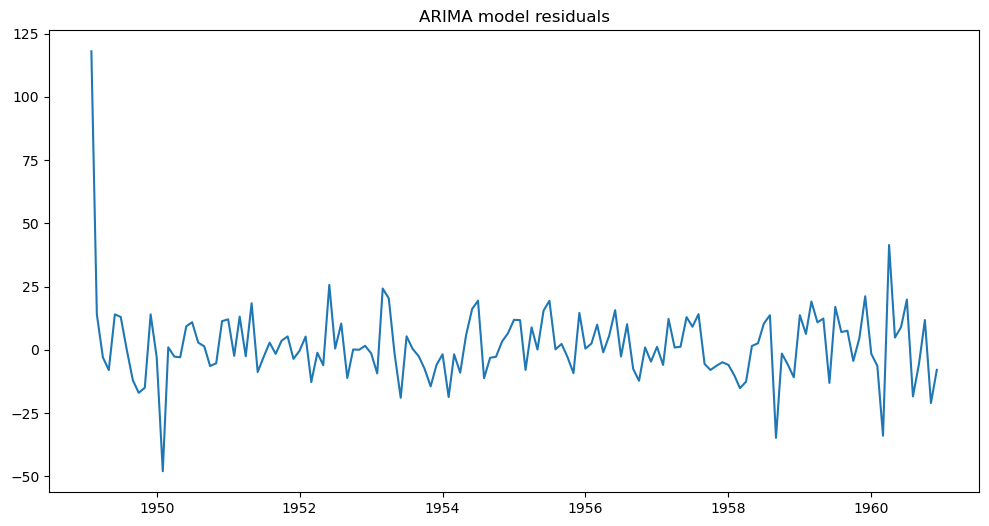

In [20]:
# Plot residuals 
plt.figure(figsize=(12,6))
plt.plot(model_fit.resid)
plt.title('ARIMA model residuals')
plt.show()

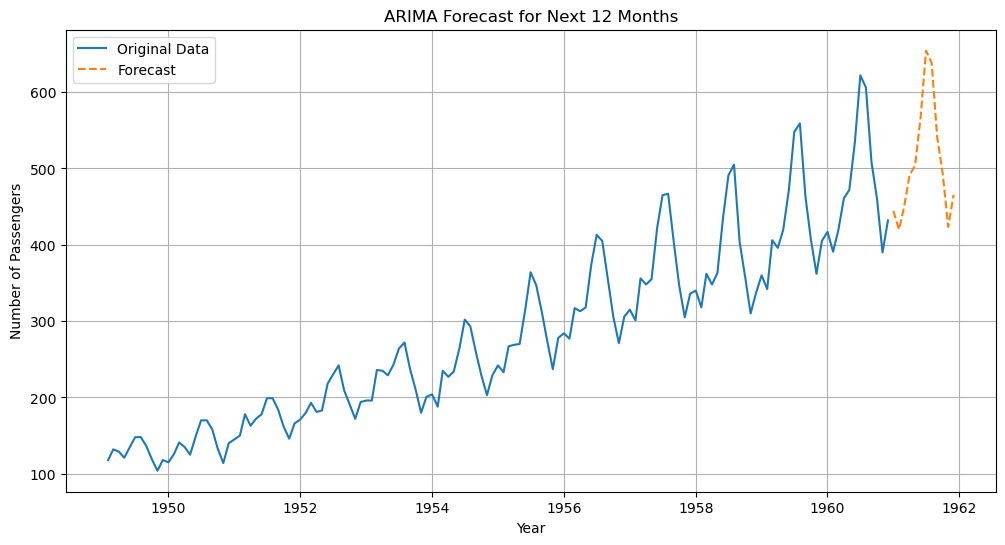

In [22]:
# Forecasting
forecast = model_fit.forecast(steps=12)

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Passengers'], label="Original Data")
plt.plot(pd.date_range(data.index[-1], periods=12, freq='M'), forecast, label="Forecast", linestyle="dashed")
plt.xlabel("Year")
plt.ylabel("Number of Passengers")
plt.title("ARIMA Forecast for Next 12 Months")
plt.legend()
plt.grid()
plt.show()